# Analyse PS S2 correlations

Load and analyse correlation coeffiecents.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# Correlations files
coor_fn_list = {
    1: "./data/Izola_coeff.csv",
    2: "./data/Jesenice_coeff.csv",
    3: "./data/Kranj_coeff.csv",
    4: "./data/Radenci_coeff.csv",
}

In [48]:
coor_fn_list.keys()

dict_keys([1, 2, 3, 4])

In [61]:
li = []
for area in coor_fn_list.keys():
    df = pd.read_csv(
        coor_fn_list[area],
        index_col=0,
        dtype={"band": "int"},
        parse_dates=["PS_Date", "S2_Date"],
    )
    df["Area"] = area
    li.append(df)
corr_df = pd.concat(li, axis=0, ignore_index=True)

In [62]:
corr_df.head()

,PS_filename,PS_Date,S2_filename,S2_Date,band,perc_valid,m,b,Area
0,I5_20170124_0e30_analytic_mosaic.tif,2017-01-24,20170124T101311_S2A_MSIL2A_20170124T101407_W02...,2017-01-24,0,0.494453,0.000062,-0.108939,1
1,I5_20170124_0e30_analytic_mosaic.tif,2017-01-24,20170124T101311_S2A_MSIL2A_20170124T101407_W02...,2017-01-24,1,0.494453,0.000072,-0.102311,1
2,I5_20170124_0e30_analytic_mosaic.tif,2017-01-24,20170124T101311_S2A_MSIL2A_20170124T101407_W02...,2017-01-24,2,0.494453,0.000072,-0.063634,1
3,I5_20170124_0e30_analytic_mosaic.tif,2017-01-24,20170124T101311_S2A_MSIL2A_20170124T101407_W02...,2017-01-24,3,0.494453,0.000091,-0.010202,1
4,I5_20170313_0e14_analytic_mosaic.tif,2017-03-13,20170312T100021_S2A_MSIL2A_20170312T100706_C12...,2017-03-12,0,0.807692,0.000036,-0.066416,1


In [63]:
corr_df.dtypes

PS_filename            object
PS_Date        datetime64[ns]
S2_filename            object
S2_Date        datetime64[ns]
band                    int32
perc_valid            float64
m                     float64
b                     float64
Area                    int64
dtype: object

In [64]:
corr_df.describe()

,band,perc_valid,m,b,Area
count,10688.000000,10688.000000,10688.000000,10688.000000,10688.000000
mean,1.500000,0.707249,0.000029,0.006610,2.547156
std,1.118086,0.189715,0.000025,0.104097,1.072999
min,0.000000,0.301036,-0.000091,-0.732662,1.000000
25%,0.750000,0.556953,0.000011,-0.061891,2.000000
50%,1.500000,0.732988,0.000027,-0.021068,2.000000
75%,2.250000,0.865833,0.000041,0.069278,4.000000
max,3.000000,0.996672,0.000415,0.407887,4.000000


In [65]:
# Use only PS_Date, m, and Area
corr_sub_df = corr_df[["PS_Date", "band", "m", "Area"]]

In [66]:
corr_sub_df.head()

,PS_Date,band,m,Area
0,2017-01-24,0,0.000062,1
1,2017-01-24,1,0.000072,1
2,2017-01-24,2,0.000072,1
3,2017-01-24,3,0.000091,1
4,2017-03-13,0,0.000036,1


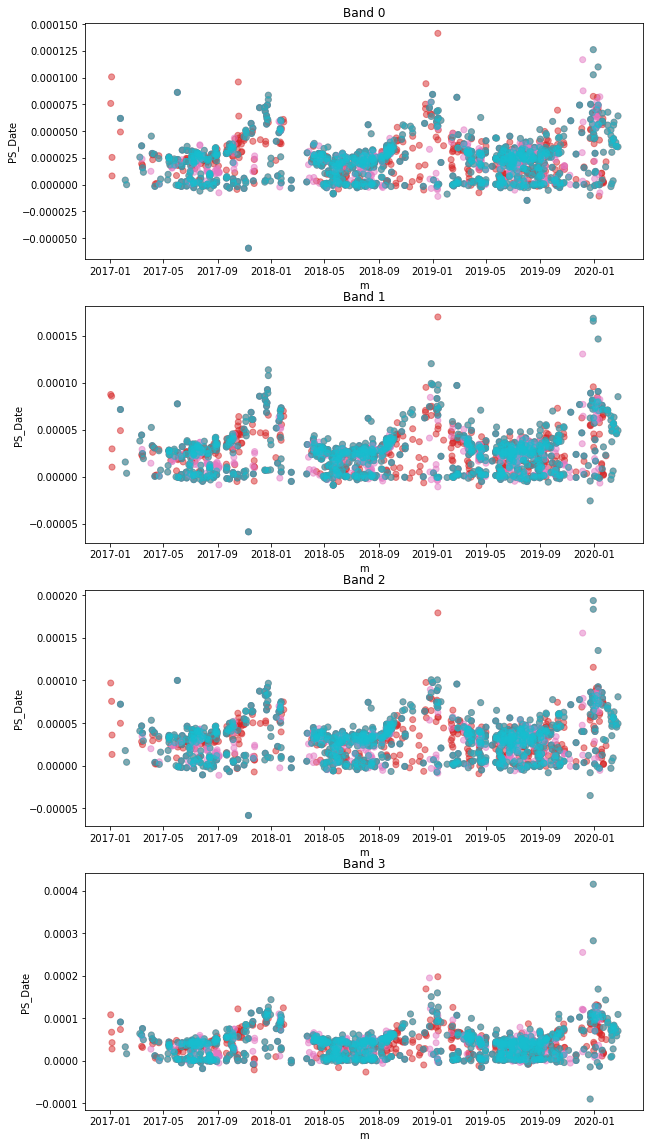

In [69]:
# Make subplots by band of PS_Date vs m, color by Area
fig, ax = plt.subplots(4, 1, figsize=(10, 20))
for i, band in enumerate(np.unique(corr_sub_df["band"])):
    ax[i].scatter(
        corr_sub_df.loc[corr_sub_df["band"] == band, "PS_Date"],
        corr_sub_df.loc[corr_sub_df["band"] == band, "m"],
        c=corr_sub_df.loc[corr_sub_df["band"] == band, "Area"],
        cmap="tab10",
        alpha=0.5,
    )
    ax[i].set_title(f"Band {band}")
    ax[i].set_xlabel("m")
    ax[i].set_ylabel("PS_Date")

band                   0         1         2         3
PS_Date                                               
2017-01-24  6.181589e-05  0.000072  0.000072  0.000091
2017-03-13  3.618169e-05  0.000044  0.000047  0.000060
2017-03-15  1.570509e-05  0.000025  0.000038  0.000075
2017-04-06  2.910459e-05  0.000033  0.000042  0.000051
2017-04-11  2.828104e-05  0.000031  0.000039  0.000046
...                  ...       ...       ...       ...
2020-01-11  7.431495e-05  0.000091  0.000092  0.000128
2020-01-12  5.580883e-05  0.000070  0.000073  0.000102
2020-01-14 -2.128793e-07 -0.000002 -0.000003 -0.000013
2020-01-20  3.172116e-05  0.000042  0.000049  0.000067
2020-01-21  5.850261e-05  0.000072  0.000079  0.000104

[295 rows x 4 columns]
band               0         1         2         3
PS_Date                                           
2017-01-02  0.000076  0.000088  0.000097  0.000108
2017-01-04  0.000101  0.000086  0.000075  0.000067
2017-01-05  0.000017  0.000020  0.000025  0.000035
2017-0

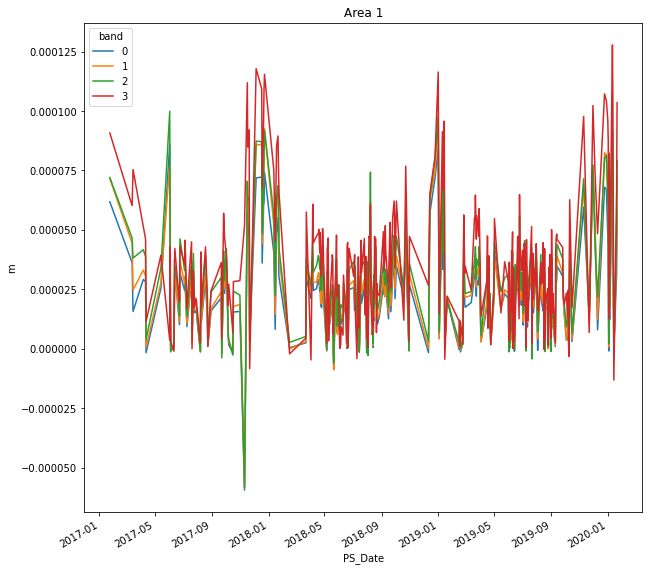

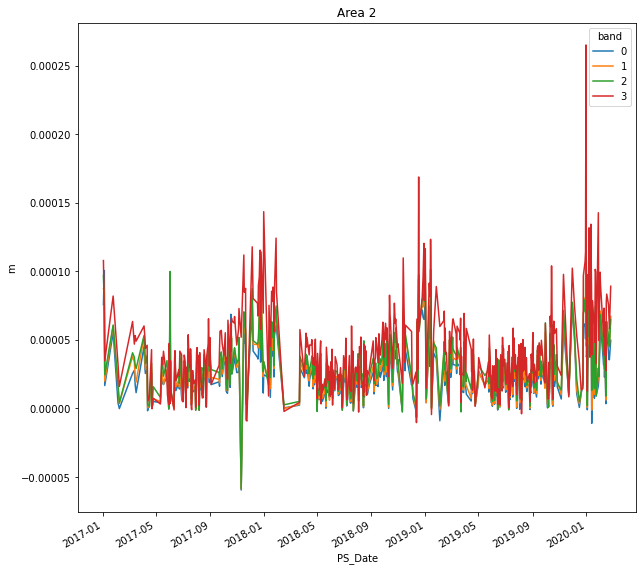

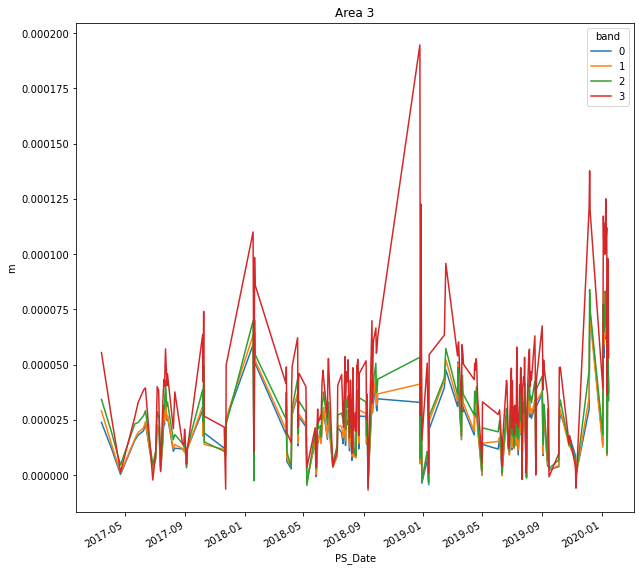

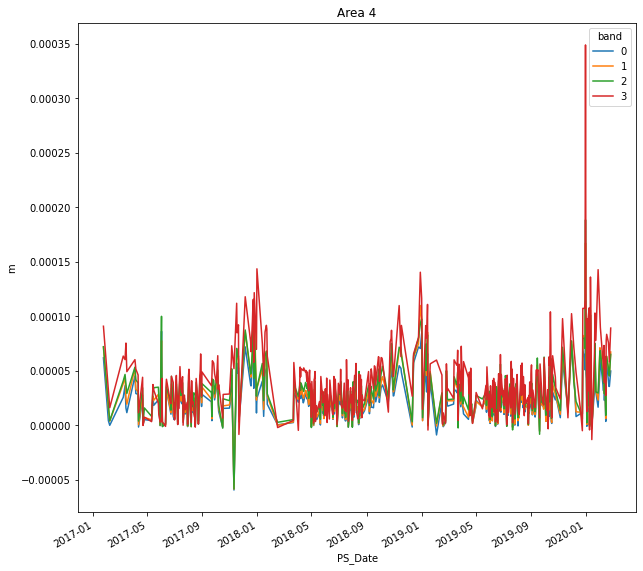

In [94]:
# Plot PS_Date vs m, for each area and band
for area in np.unique(corr_sub_df["Area"]):
    # Get df for area, drop area column
    area_df = corr_sub_df.loc[corr_sub_df["Area"] == area, :].drop(
        columns=["Area"]
    )
    # Convert to wide
    df = pd.pivot_table(area_df,index=['PS_Date'], columns = 'band', values = "m")
    print(df)
    # Plot
    fig, ax = plt.subplots(figsize=(10, 10))
    df.plot(ax=ax)
    ax.set_title(f"Area {area}")
    ax.set_xlabel("PS_Date")
    ax.set_ylabel("m")

band                   0         1         2         3
PS_Date                                               
2017-01-24  6.181589e-05  0.000072  0.000072  0.000091
2017-03-13  3.618169e-05  0.000044  0.000047  0.000060
2017-03-15  1.570509e-05  0.000025  0.000038  0.000075
2017-04-06  2.910459e-05  0.000033  0.000042  0.000051
2017-04-11  2.828104e-05  0.000031  0.000039  0.000046
...                  ...       ...       ...       ...
2020-01-11  7.431495e-05  0.000091  0.000092  0.000128
2020-01-12  5.580883e-05  0.000070  0.000073  0.000102
2020-01-14 -2.128793e-07 -0.000002 -0.000003 -0.000013
2020-01-20  3.172116e-05  0.000042  0.000049  0.000067
2020-01-21  5.850261e-05  0.000072  0.000079  0.000104

[295 rows x 4 columns]
band               0         1         2         3
PS_Date                                           
2017-01-02  0.000076  0.000088  0.000097  0.000108
2017-01-04  0.000101  0.000086  0.000075  0.000067
2017-01-05  0.000017  0.000020  0.000025  0.000035
2017-0

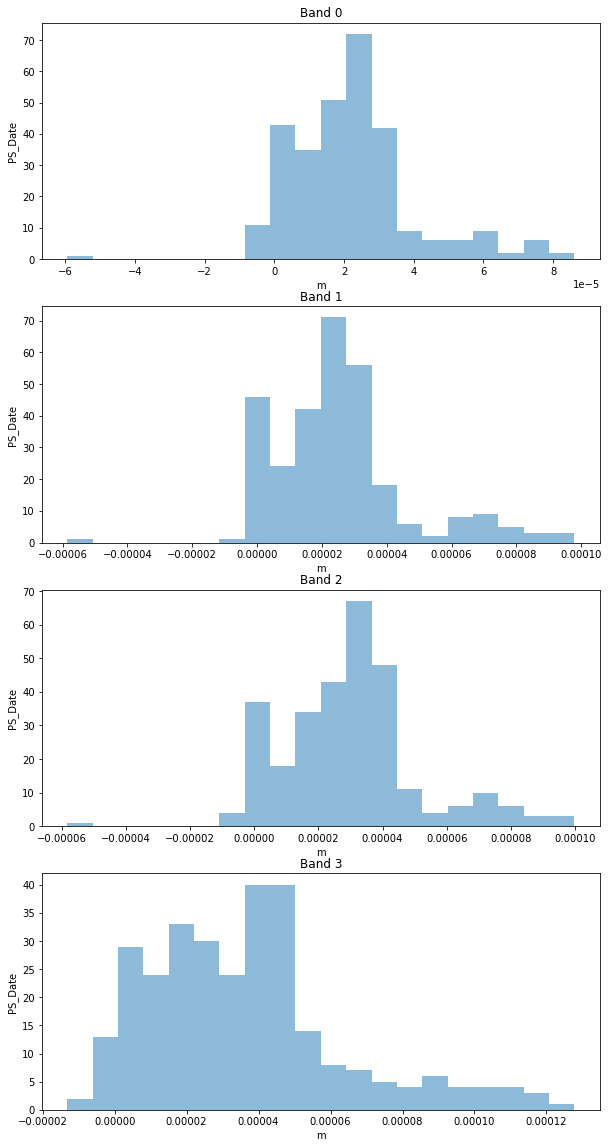

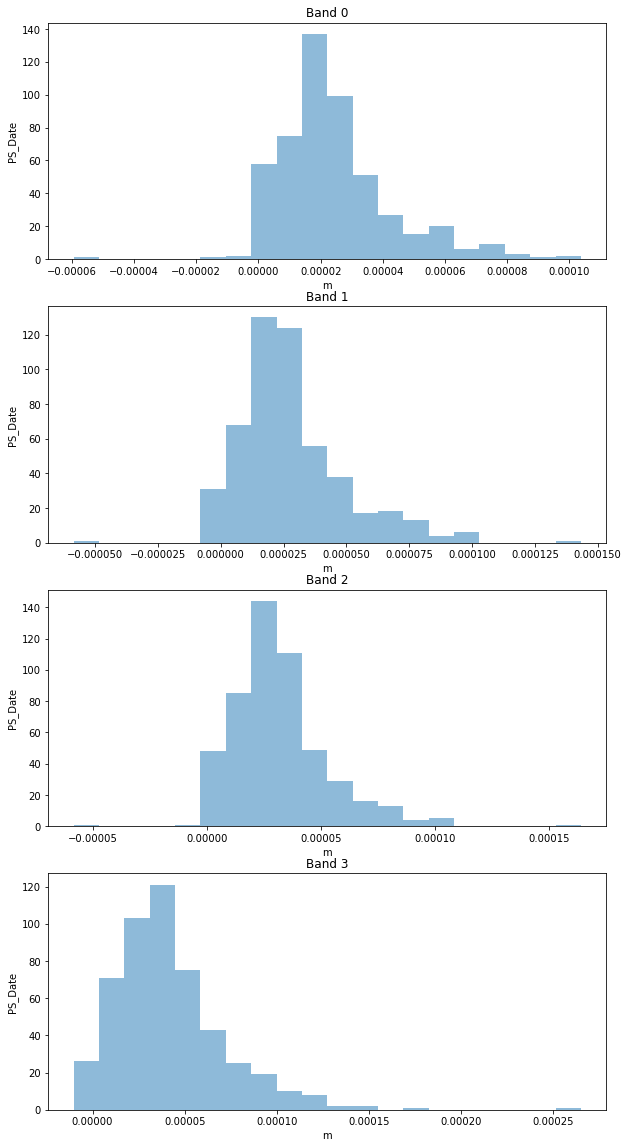

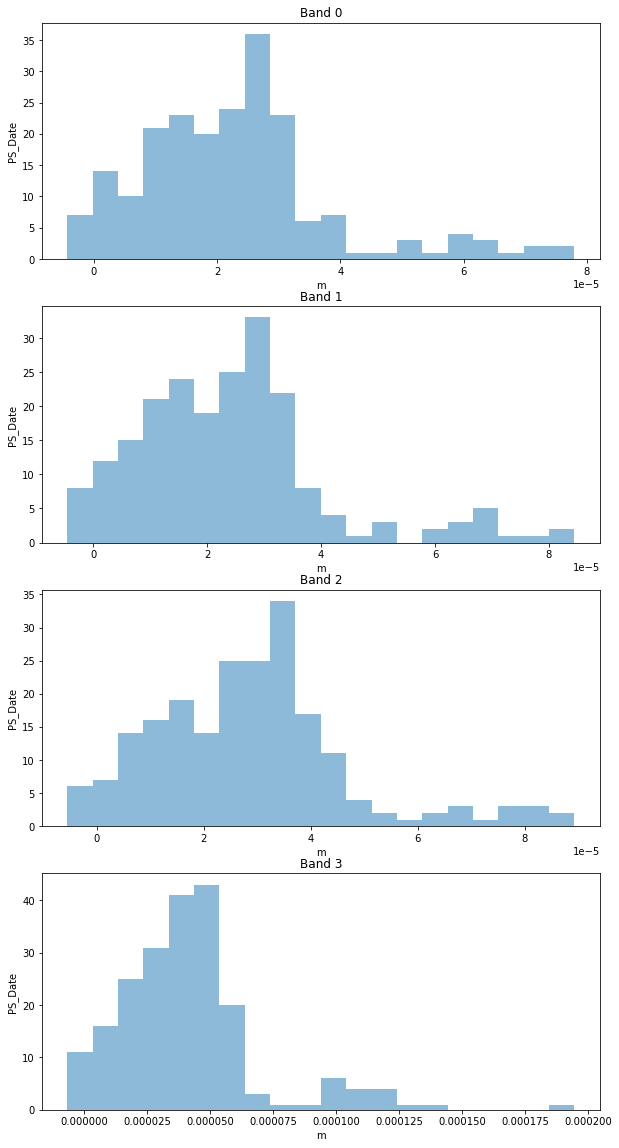

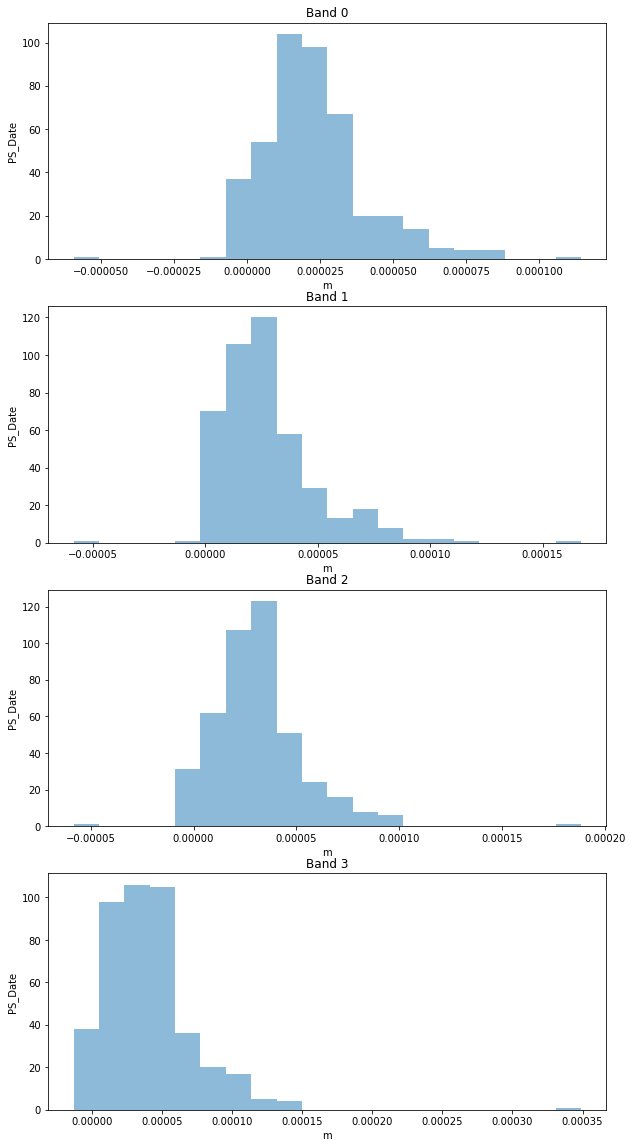

In [96]:
# Plot PS_Date vs m, for each area and band
for area in np.unique(corr_sub_df["Area"]):
    # Get df for area, drop area column
    area_df = corr_sub_df.loc[corr_sub_df["Area"] == area, :].drop(
        columns=["Area"]
    )
    # Convert to wide
    df = pd.pivot_table(area_df,index=['PS_Date'], columns = 'band', values = "m")
    print(df)
    # Plot histogram by band
    fig, ax = plt.subplots(4, 1, figsize=(10, 20))
    for i, band in enumerate(np.unique(area_df["band"])):
        ax[i].hist(
            df.loc[:, band],
            bins=20,
            label=f"Band {band}",
            alpha=0.5,
        )
        ax[i].set_title(f"Band {band}")
        ax[i].set_xlabel("m")
        ax[i].set_ylabel("PS_Date")

Area               1         2   3         4
PS_Date                                     
2017-01-02       NaN  0.000076 NaN       NaN
2017-01-04       NaN  0.000101 NaN       NaN
2017-01-05       NaN  0.000017 NaN       NaN
2017-01-24  0.000062  0.000055 NaN  0.000062
2017-02-04       NaN  0.000004 NaN  0.000004
...              ...       ...  ..       ...
2020-02-16       NaN  0.000058 NaN  0.000058
2020-02-20       NaN  0.000039 NaN  0.000039
2020-02-21       NaN  0.000036 NaN  0.000036
2020-02-22       NaN  0.000036 NaN  0.000036
2020-02-25       NaN  0.000050 NaN  0.000050

[539 rows x 4 columns]
Area               1         2   3         4
PS_Date                                     
2017-01-02       NaN  0.000088 NaN       NaN
2017-01-04       NaN  0.000086 NaN       NaN
2017-01-05       NaN  0.000020 NaN       NaN
2017-01-24  0.000072  0.000060 NaN  0.000072
2017-02-04       NaN  0.000016 NaN  0.000016
...              ...       ...  ..       ...
2020-02-16       NaN  0.000063 

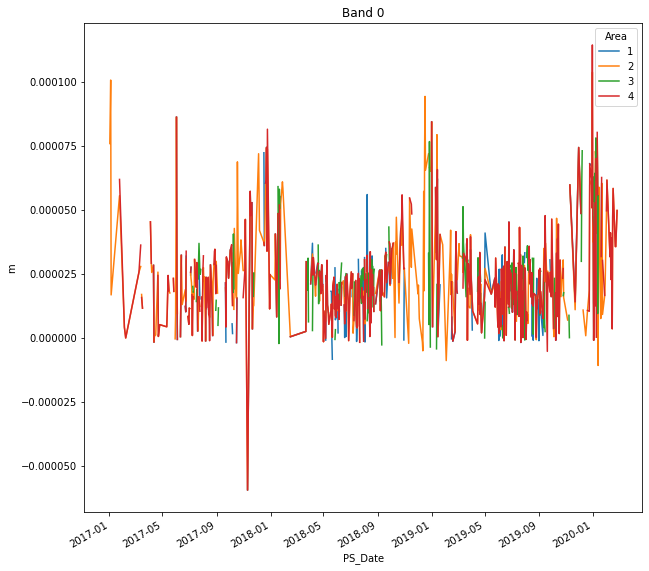

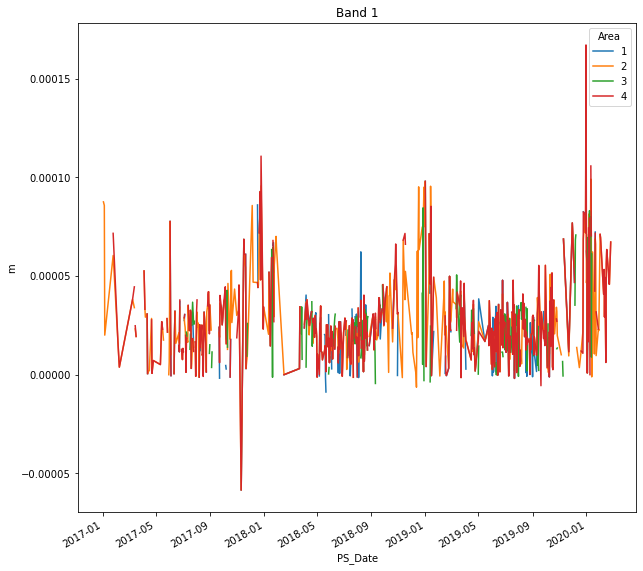

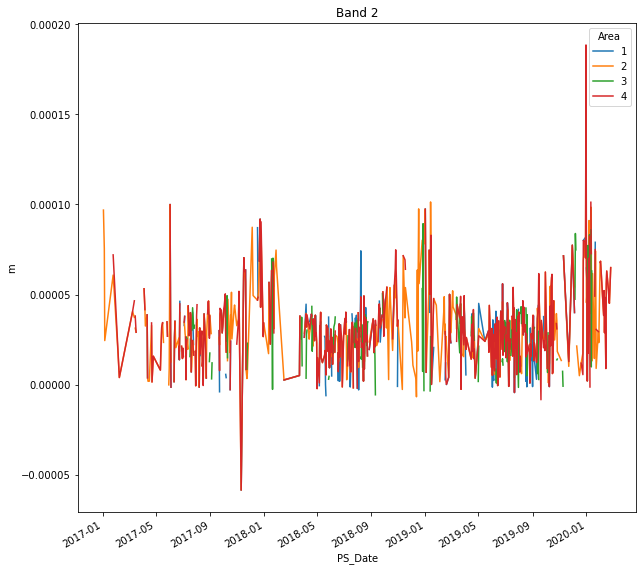

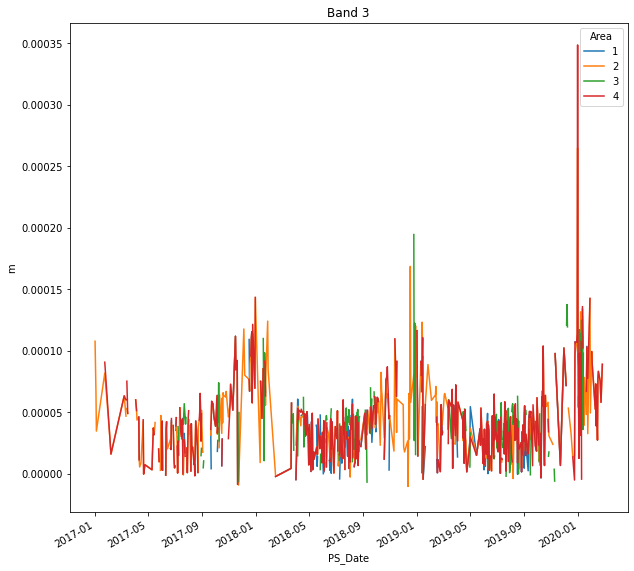

In [97]:
# Iterate over bands
for band in np.unique(corr_sub_df["band"]):
    # Get df for band, drop band column
    band_df = corr_sub_df.loc[corr_sub_df["band"] == band, :].drop(
        columns=["band"]
    )
    # Convert to wide
    df = pd.pivot_table(band_df,index=['PS_Date'], columns = 'Area', values = "m")
    print(df)
    # Plot
    fig, ax = plt.subplots(figsize=(10, 10))
    df.plot(ax=ax)
    ax.set_title(f"Band {band}")
    ax.set_xlabel("PS_Date")
    ax.set_ylabel("m")

In [107]:
# Iterate over bands, plot histogram of m and color by area

TypeError: figure() got multiple values for argument 'figsize'

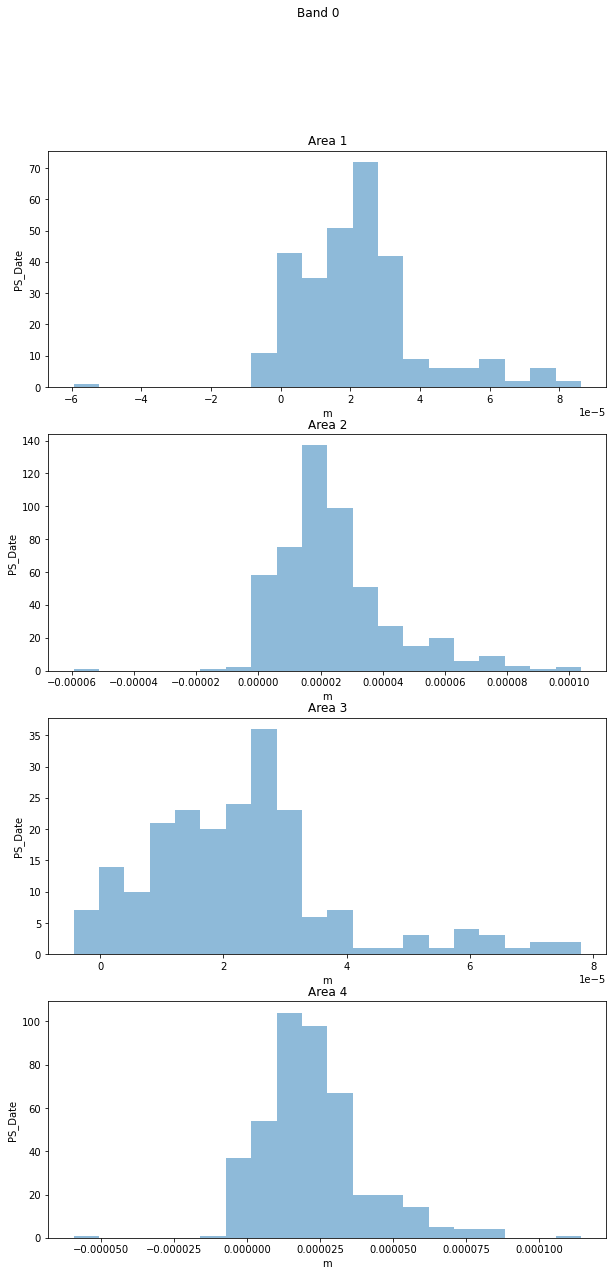

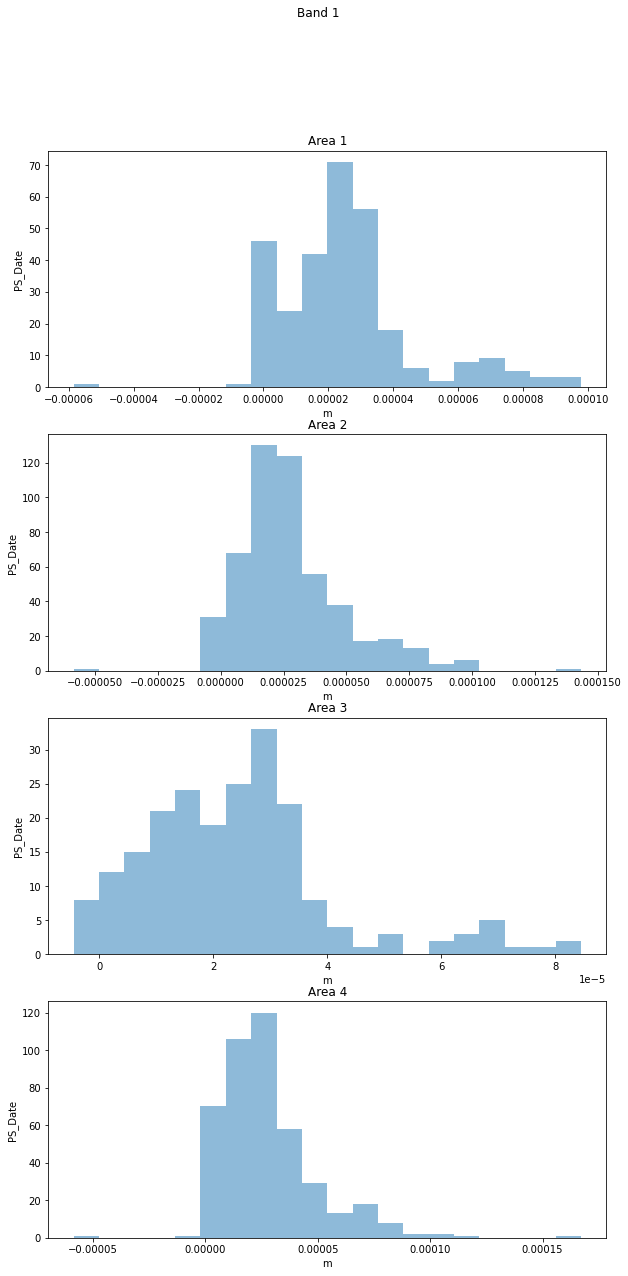

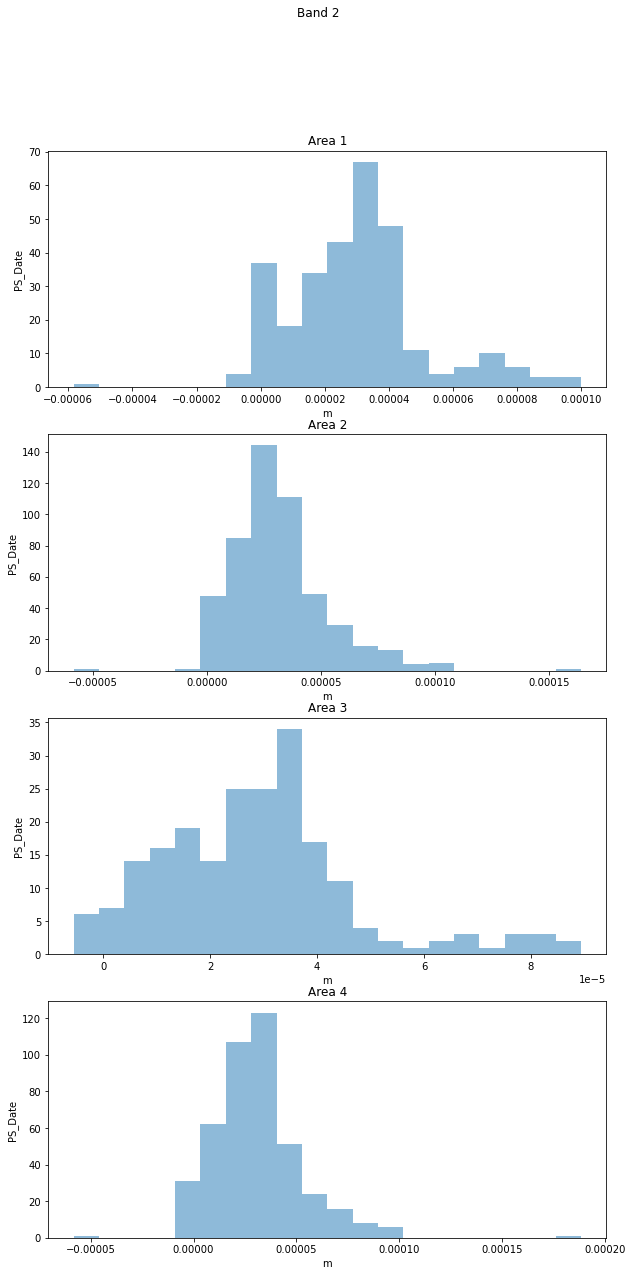

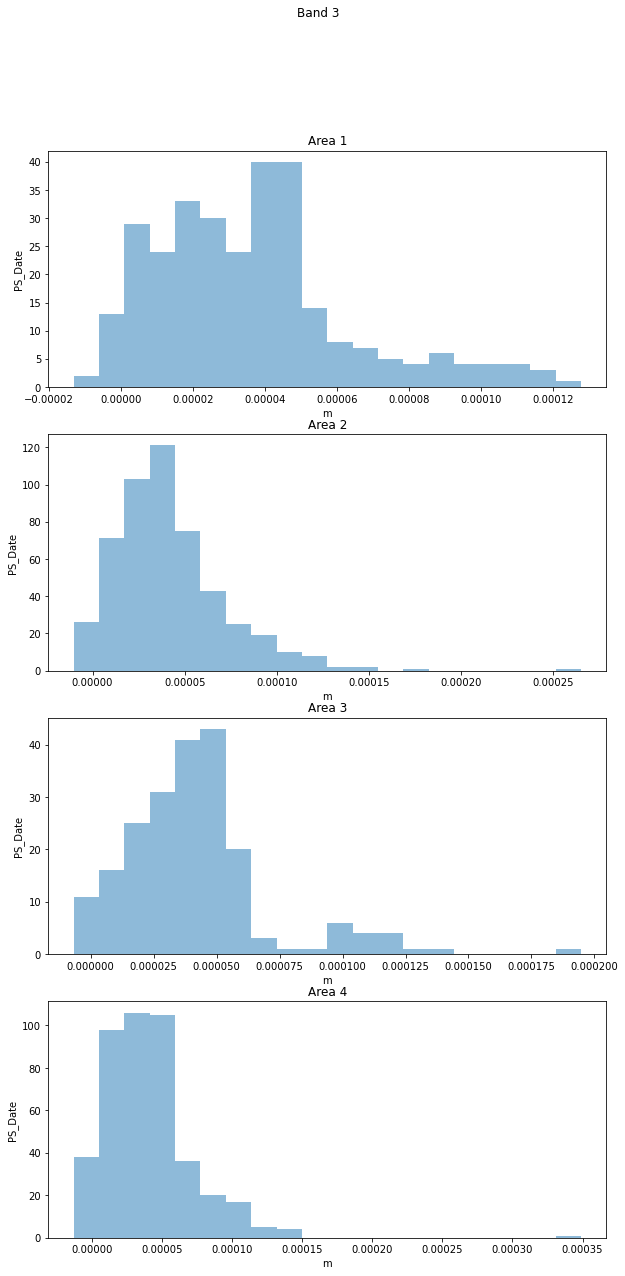

In [113]:
# Plot multiple histograms by are on the same plot
for band in np.unique(corr_sub_df["band"]):
    # Get df for band, drop band column
    band_df = corr_sub_df.loc[corr_sub_df["band"] == band, :].drop(
        columns=["band"]
    )
    # Convert to wide
    df = pd.pivot_table(band_df,index=['PS_Date'], columns = 'Area', values = "m")
    # print(df)
    # Plot
    fig, ax = plt.subplots(4, 1, figsize=(10, 20))
    fig.suptitle(f"Band {band}")
    for i, area in enumerate(np.unique(band_df["Area"])):
        ax[i].hist(
            df.loc[:, area],
            bins=20,
            label=f"Area {area}",
            alpha=0.5,
        )
        ax[i].set_title(f"Area {area}")
        ax[i].set_xlabel("m")
        ax[i].set_ylabel("PS_Date")

## Mean m by band and area

In [114]:
corr_sub_df.head()

,PS_Date,band,m,Area
0,2017-01-24,0,0.000062,1
1,2017-01-24,1,0.000072,1
2,2017-01-24,2,0.000072,1
3,2017-01-24,3,0.000091,1
4,2017-03-13,0,0.000036,1


In [122]:
# Compute mean m by area and band
mean_m_by_area_band = corr_sub_df.groupby(["band", "Area"]).mean()

In [123]:
mean_m_by_area_band.head()

m
band Area          
0    1     0.000021
     2     0.000023
     3     0.000023
     4     0.000022
1    1     0.000024

In [125]:
# To wide
mean_m_by_area_band_wide = mean_m_by_area_band.unstack()

In [126]:
mean_m_by_area_band_wide.head()

m                              
Area         1         2         3         4
band                                        
0     0.000021  0.000023  0.000023  0.000022
1     0.000024  0.000027  0.000024  0.000026
2     0.000029  0.000031  0.000028  0.000030
3     0.000035  0.000040  0.000041  0.000039

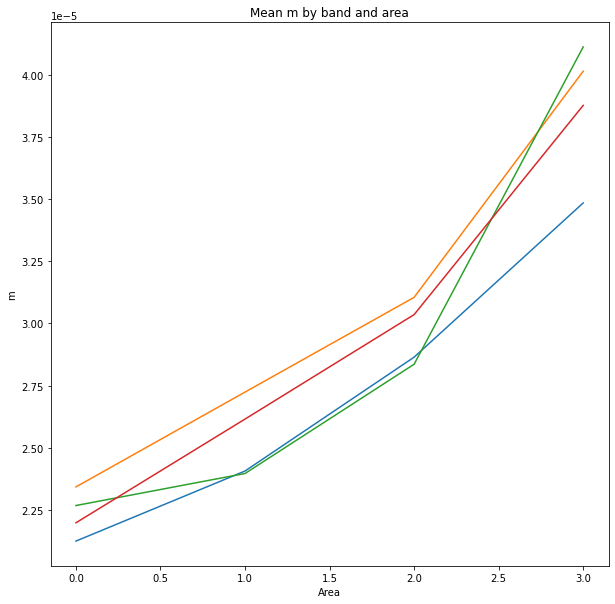

In [131]:
# Plot mean m by band
fig, ax = plt.subplots(figsize=(10, 10))
mean_m_by_area_band_wide.plot(ax=ax)
ax.set_title("Mean m by band and area")
ax.set_xlabel("Area")
ax.set_ylabel("m")
# No legend
ax.legend().set_visible(False)

## Mean m by band

In [137]:
corr_sub_df.head()

,PS_Date,band,m,Area
0,2017-01-24,0,0.000062,1
1,2017-01-24,1,0.000072,1
2,2017-01-24,2,0.000072,1
3,2017-01-24,3,0.000091,1
4,2017-03-13,0,0.000036,1


In [142]:
# Compute mean m by band, ignore Area
mean_m_by_band = corr_sub_df.groupby("band").mean()

In [144]:
# Drop Area column
mean_m_by_band = mean_m_by_band.drop(columns=["Area"])

In [145]:
mean_m_by_band.head()

,m
band,
0,0.000023
1,0.000026
2,0.000030
3,0.000039


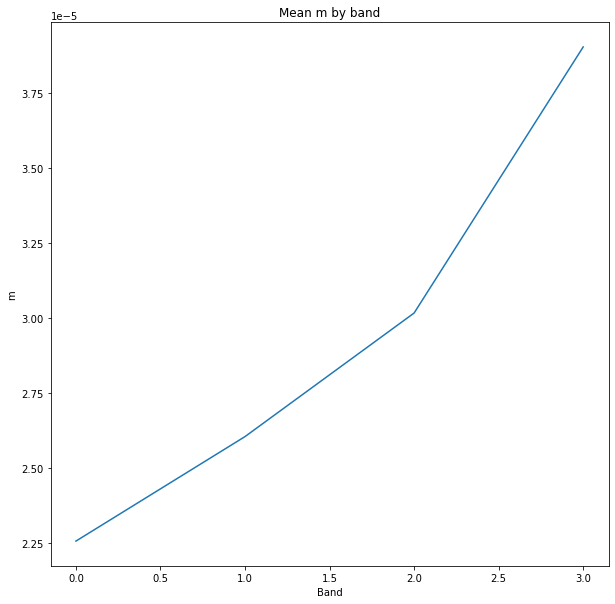

In [147]:
# Plot mean m by band
fig, ax = plt.subplots(figsize=(10, 10))
mean_m_by_band.plot(ax=ax)
ax.set_title("Mean m by band")
ax.set_xlabel("Band")
ax.set_ylabel("m")
# No legend
ax.legend().set_visible(False)